In [1]:
import numpy as np
import galsim
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import random
%matplotlib inline

In [2]:
big_fft_params=galsim.GSParams(maximum_fft_size=81488)
pixelscale=0.01 # size of pixel in arcsec
stampimage = galsim.ImageF(96, 96, scale=pixelscale)
b=galsim.BoundsI(1,96,1,96)
stamp=stampimage[b]

## 1-Simulating SFG at 1400 MHz

###### Opening T-RECS catalogue (from Bonaldi et al. 2018)

In [3]:
catalogsfg=fits.open('catalogue_SFGs_complete_deep.fits')
catalogsfg.info()
cat1=catalogsfg[1]
catdatasfg=cat1.data

Filename: catalogue_SFGs_complete_deep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  Catalogue     1 BinTableHDU    197   4815516R x 47C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   


##### Randomly draw nobj among the whole SFG catalogue with condition on size

In [4]:
flux1400sfg=catdatasfg['I1400']  # flux density at 1400 MHz
sizesfg=catdatasfg['size'] # angular size on the sky (in arcsec)
e1=catdatasfg['e1']  # first ellipticity
e2=catdatasfg['e2']  # second ellipticity

(0, 10)

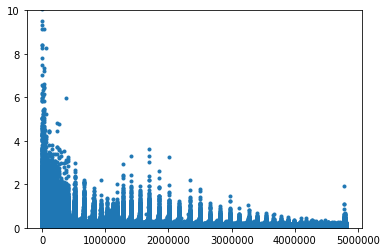

In [5]:
plt.plot(sizesfg,'.')
plt.ylim([0,10])

In [6]:
filterobj=np.logical_and(sizesfg > 10*pixelscale, sizesfg <100*pixelscale)
filterobj2=np.where(filterobj == True)[0]

In [7]:
nobj=100
Ntotobj=len(filterobj2)
print Ntotobj
randidx=np.random.randint(0,Ntotobj,nobj)

634161


(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)


/Users/fnammour/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)


<Figure size 432x288 with 0 Axes>

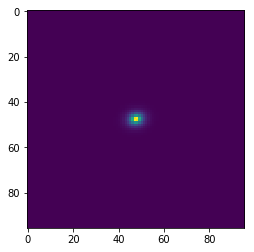

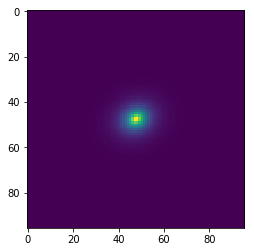

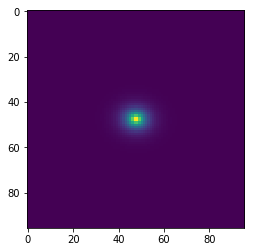

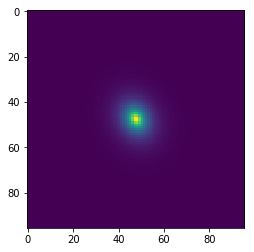

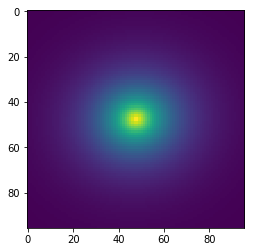

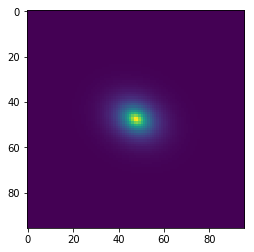

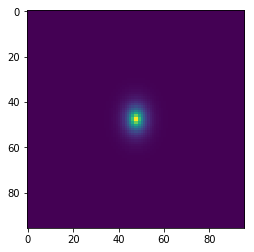

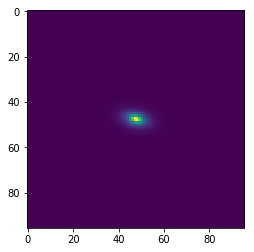

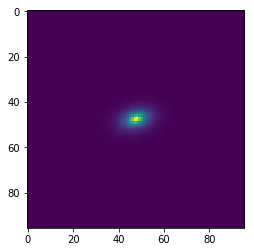

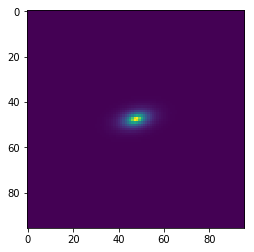

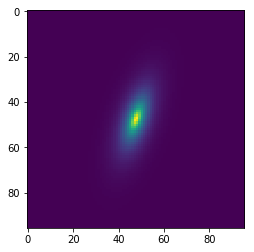

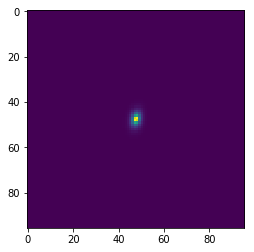

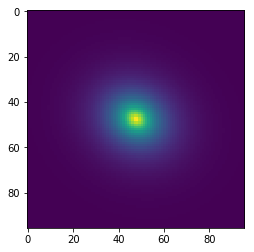

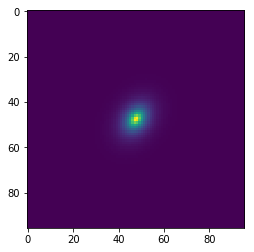

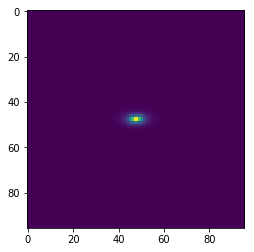

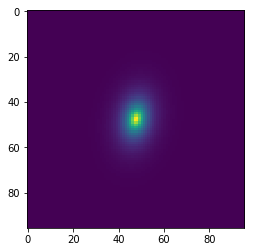

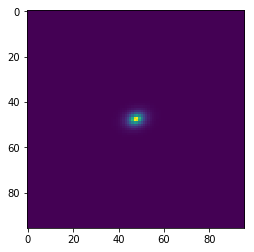

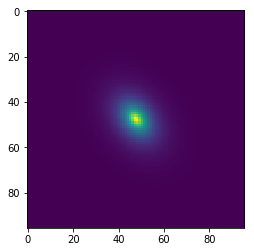

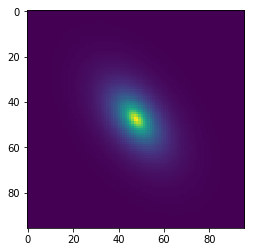

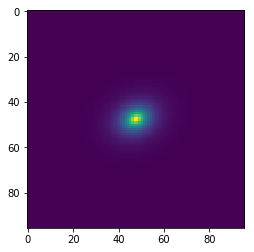

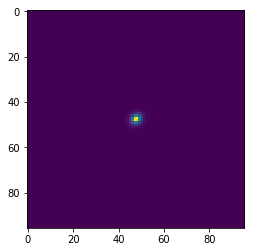

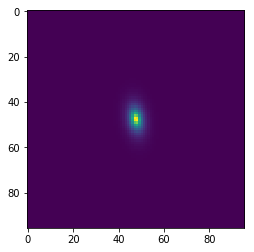

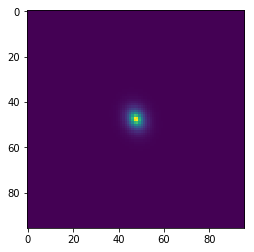

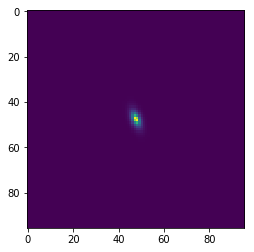

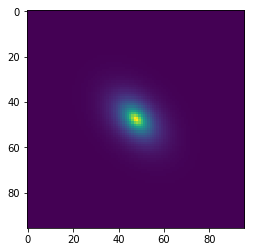

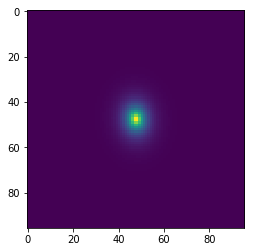

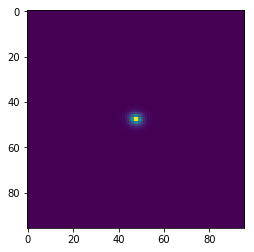

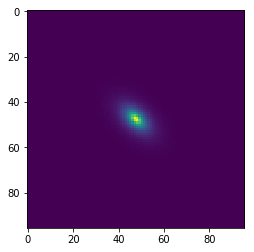

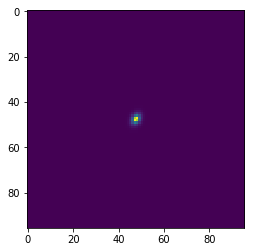

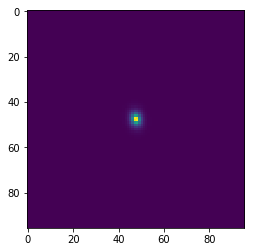

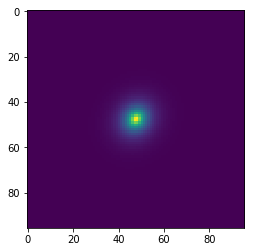

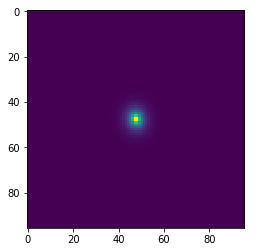

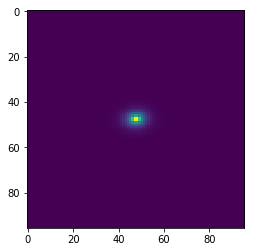

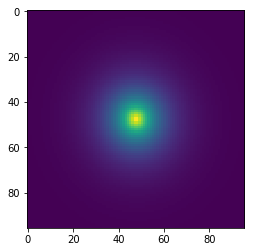

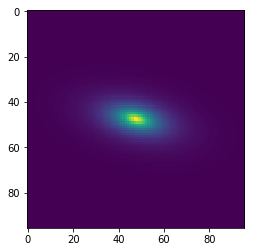

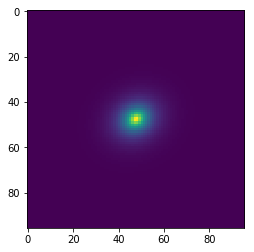

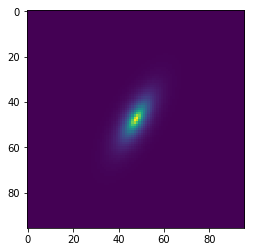

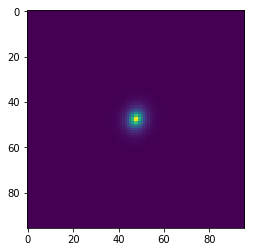

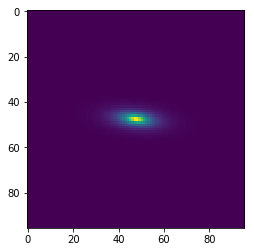

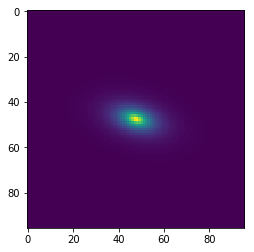

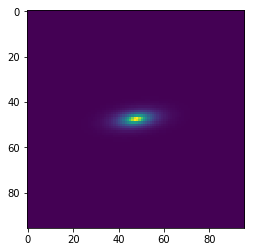

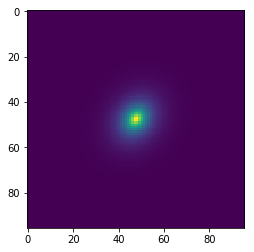

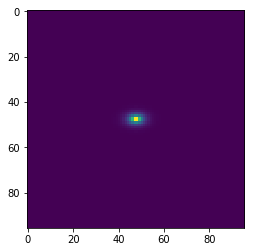

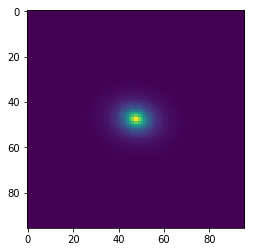

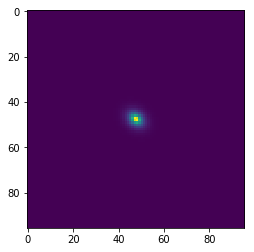

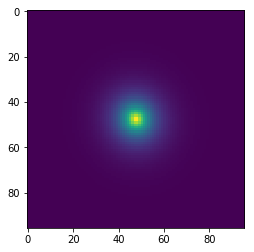

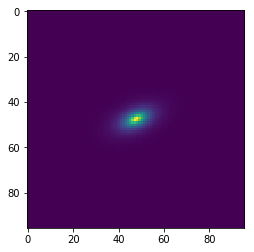

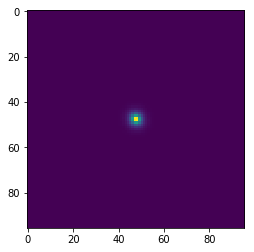

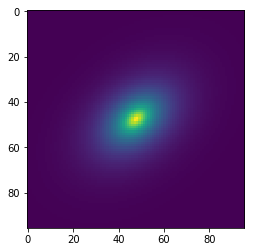

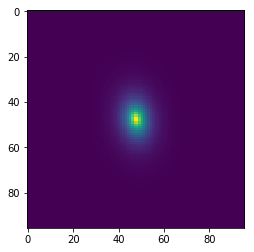

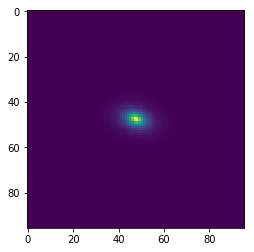

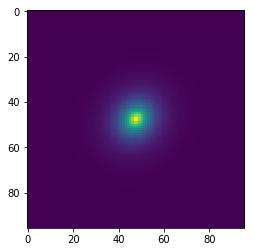

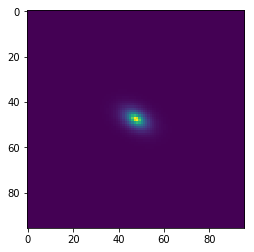

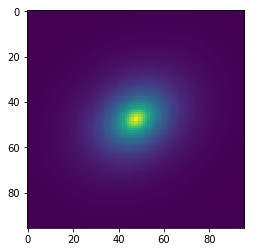

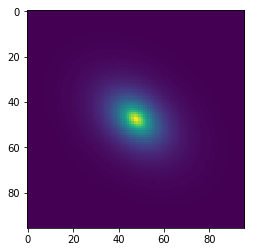

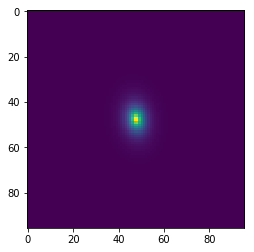

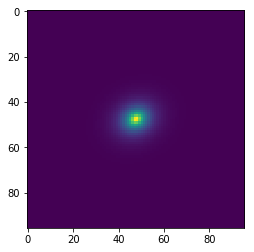

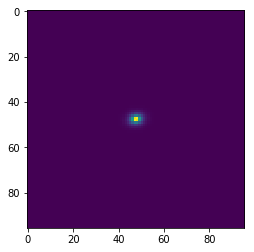

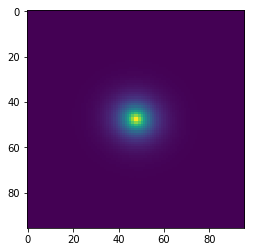

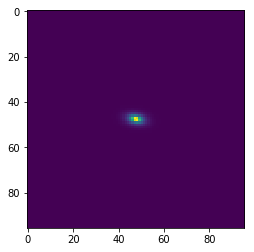

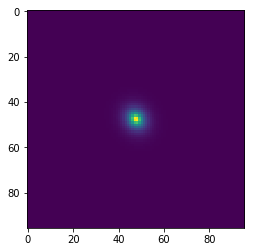

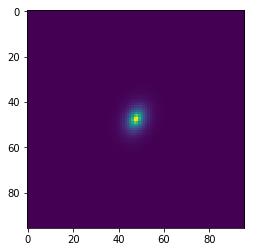

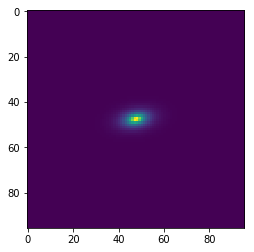

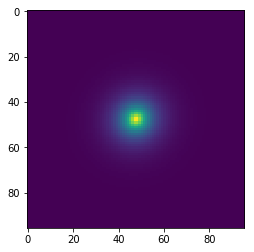

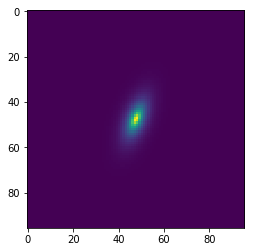

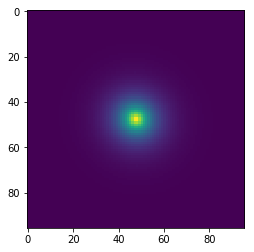

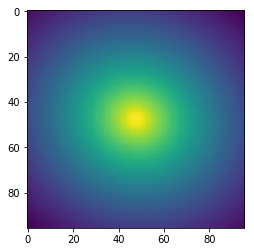

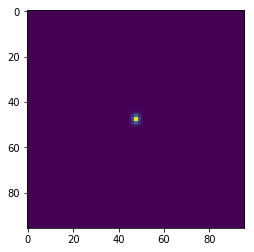

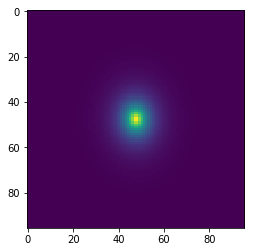

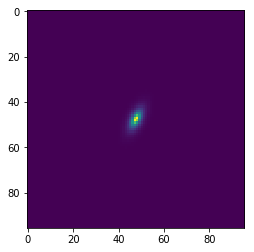

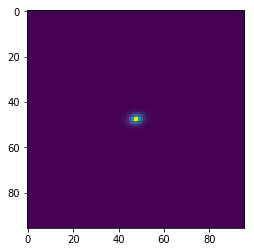

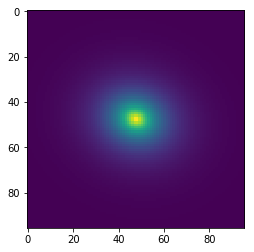

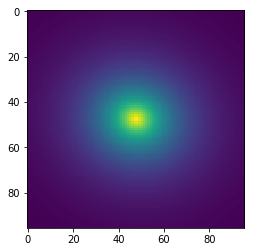

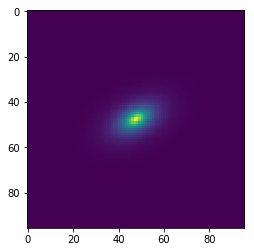

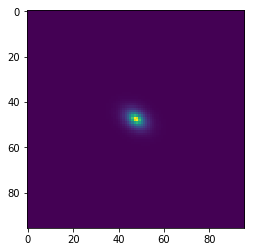

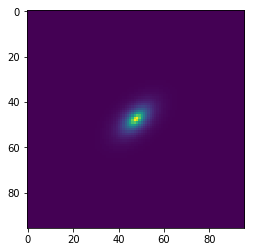

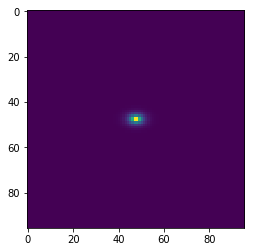

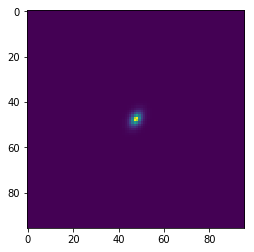

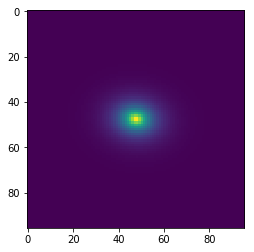

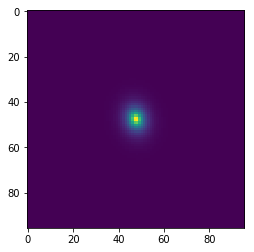

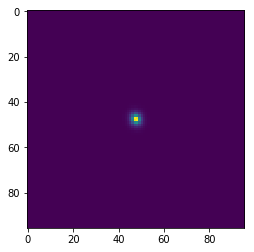

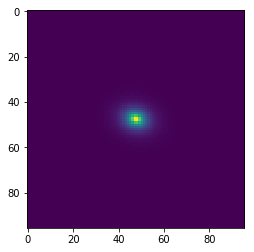

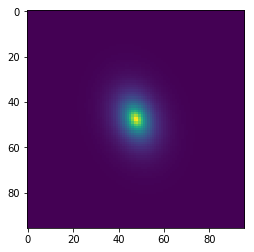

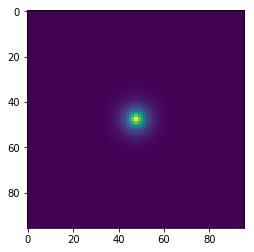

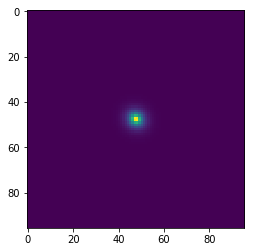

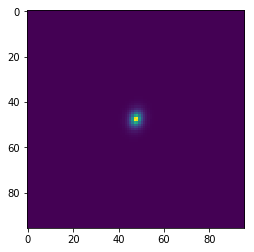

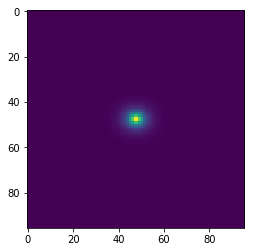

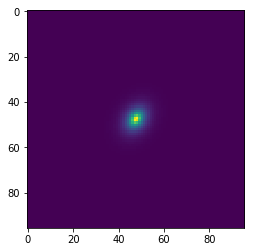

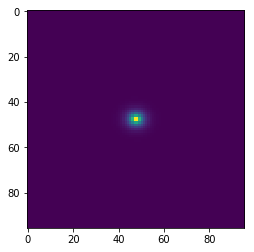

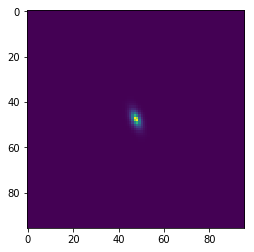

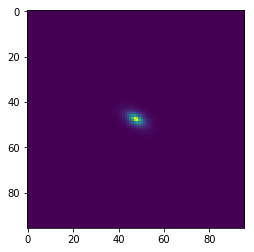

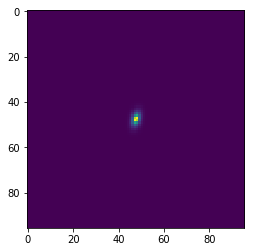

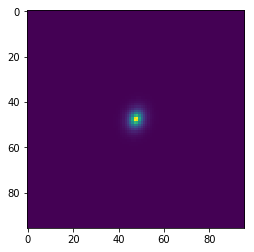

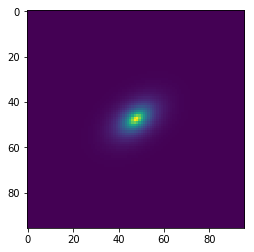

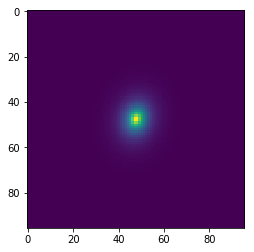

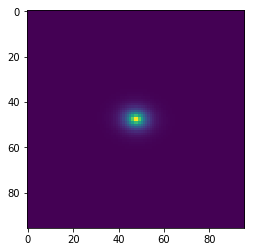

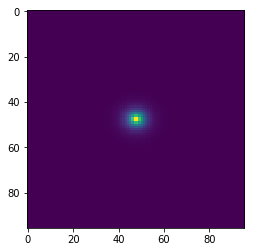

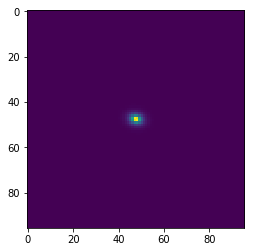

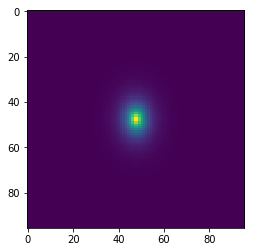

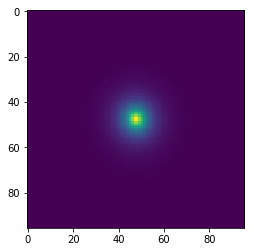

In [8]:
# Star-forming galaxies (T-RECS)
f=plt.figure()
tabgal=[]
for iobj in randidx:
    gauss_gal=galsim.Gaussian(fwhm=sizesfg[iobj],flux=flux1400sfg[iobj])
    gal = galsim.Exponential(half_light_radius=gauss_gal.half_light_radius, flux=flux1400sfg[iobj], gsparams=big_fft_params)
    ellipticity = galsim.Shear(e1=e1[iobj],e2=e2[iobj])
    gal = gal.shear(ellipticity)
    gal2=gal.drawImage(stamp,scale=pixelscale)
    print gal2.array.shape
    tabgal.append(gal2.array)
    plt.figure(iobj+1)
    plt.imshow(gal2.array)
    

In [9]:
np.savez("Cat-SFG.npz",nobj=nobj,listgal=np.array(tabgal),flux1400sfg=flux1400sfg[randidx],sizesfg=sizesfg[randidx],randidx=randidx,e1=e1[randidx],e2=e2[randidx])

#### Distribution of eps1 and eps2 on the random objects

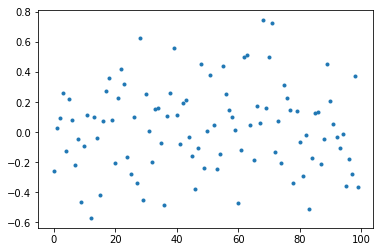

In [10]:
plt.plot(e1[randidx],'.')

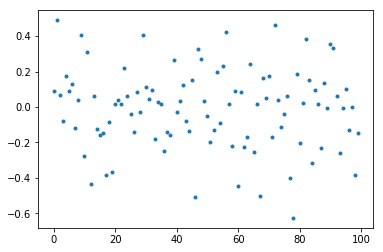

In [11]:
plt.plot(e2[randidx],'.')

## 2- Simulating AGN at 1400 MHz (pas validé encore)

###### Opening T-RECS catalogue (from Bonaldi et al. 2018)

In [12]:
catalogagn=fits.open('catalogue_AGNs_complete_deep.fits')
catalogagn.info()
cat1=catalogagn[1]
catdata=cat1.data

Filename: catalogue_AGNs_complete_deep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  Catalogue     1 BinTableHDU    201   66167R x 48C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   


In [13]:
flux1400agn=catdata['I1400']
sizeagn=catdata['size']
rsagn=catdata['Rs']  # ratio between overall size and location of hotspots

In [14]:
#min max of rati
print np.min(rsagn),np.max(rsagn)

0.0 0.99993676


In [15]:
filterobj=np.logical_and(sizeagn > 0.5, sizeagn <1)
filterobj2=np.where(filterobj == True)[0]
nobj=50
Ntotobj=len(filterobj2)
randidx=np.random.randint(0,Ntotobj,nobj)

24 16


IndexError: index -146 is out of bounds for axis 1 with size 96

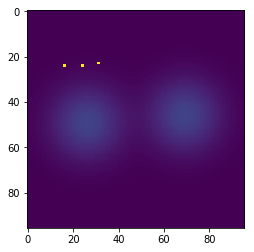

In [16]:
# Active Galactic Nuclei
posang = random.uniform(0,2.*np.pi, nobj)

tabagn=[]
for idx,iobj in enumerate(randidx):

    lobe_flux=flux1400agn[iobj]*0.99    # 99% of the flux in lobes
    hs_flux=flux1400agn[iobj]-lobe_flux  # 1% of the flux in hotspots
    hs1_flux=hs_flux/3
    hs2_flux=hs_flux/3
    hs3_flux=hs_flux/3

    hs_offset=rsagn[iobj]*sizeagn[iobj]  #hotspot offset as a fraction of the whole object in arcsec
    lobe_offset=sizeagn[iobj] # offset of the lobe = size of agn
    
    lobe1=galsim.Gaussian(sigma=sizeagn[iobj]*0.25,flux=lobe_flux/2.,gsparams=big_fft_params)
    lobe2=galsim.Gaussian(sigma=sizeagn[iobj]*0.25,flux=lobe_flux/2.,gsparams=big_fft_params)
    
    #lobe1=lobe1.shear(e1=0.3,e2=0)
    #lobe2=lobe2.shear(e1=0.3,e2=0)

    lobe1=lobe1.shift(-lobe_offset/2,0) # shift the lobe
    lobe2=lobe2.shift(lobe_offset/2,0) # shift the lobe
    gal=lobe1+lobe2 # add the two lobes
    gal = gal.rotate(posang[idx]*galsim.radians)  # rotate randomly the AGN
    gal2=gal.drawImage(stamp,scale=pixelscale)      

    hs_ix_offset = hs_offset*np.sin(posang[idx])/pixelscale #convert arcsec offset in pixels
    hs_iy_offset = hs_offset*np.cos(posang[idx])/pixelscale #convert arcsec offset in pixels
        
    # Create the sub-image for this galaxy
    cen = gal2.array.shape
    cen=map(np.int,np.array(cen)/2)
    # Add the hotspots as single pixel point sources
    gal2.array[cen[0]/2, cen[1]/2] += hs1_flux

    fact=1
    gal2.array[np.int(cen[0]/2+hs_ix_offset*fact), np.int(cen[1]/2+hs_iy_offset*fact)] += hs2_flux
    gal2.array[np.int(cen[0]/2-hs_ix_offset*fact), np.int(cen[1]/2-hs_iy_offset*fact)] += hs3_flux
    print np.int(cen[0]/2+hs_ix_offset),np.int(cen[1]/2+hs_iy_offset)
  
    tabagn.append(gal2.array)
    plt.figure(idx+1)
    plt.imshow(gal2.array)    

In [ ]:
np.savez("Cat-AGN.npz",nobj=nobj,listgal=np.array(tabagn),flux1400agn=flux1400agn[randidx],sizeagn=sizeagn[randidx],randidx=randidx)